# Time Series Analysis

**A time series is any data set where the values are measured at different points in time**. Pandas time series tools apply equally well to either type of time series. We'll cover the following sub-headings;

## The data set: Open Power Systems Data (OPSD) Germany

We'll be using the daily time series of OPSD Germany, which has been rapidly expanding its renewable energy production in recent years. 

We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools to answer questions such as:
- When is electricity consumption typically highest and lowest?
- How do wind and solar power production vary with seasons of the year?
- What are the long-term trends in electricity consumption, solar power, and wind power?
- How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

## Time series data structures

Brief introduction of main pandas data structures for working with dates and times. In pandas, a single point in time is represented as **Timestamp**.

We can use the **to_datetime()** func to create Timestamps from strings in a wide variety of date/time formats.

In [63]:
import pandas as pd

pd.to_datetime('2020-05-28 3:45pm')

Timestamp('2020-05-28 15:45:00')

In [64]:
pd.to_datetime('5/9/2020')

Timestamp('2020-05-09 00:00:00')

**Note:** to_datetime() automatically assumes the ambiguous date '5/9/2020' to be month/day/year and is interpreted as May 9, 2020. We can use the dayfirst parameter to tell pandas to interpret as September 5, 2020.

In [65]:
pd.to_datetime('5/9/2020', dayfirst=True)

Timestamp('2020-09-05 00:00:00')

If we supply a list or array of strings as input to to_datetime(), it returns a sequence of date/time values in a DatetimeIndex object, which is the core data structure that powers much of pandas time series functionality.

In [66]:
pd.to_datetime(['1997-12-20', '1994-03-26', 'Nov 20, 1986'])

DatetimeIndex(['1997-12-20', '1994-03-26', '1986-11-20'], dtype='datetime64[ns]', freq=None)

## Creating a time series DataFrame

**To work with time series data in pandas, we use a DatetimeIndex as the index for our DataFrame (or Series)**. Lets read our file in.

In [67]:
opsd = pd.read_csv('opsd_germany_daily.csv')
opsd.shape

(4383, 5)

In [68]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [69]:
#check the data types of each column

opsd.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [70]:
#Set the Date column as the DataFrame index

opsd = opsd.set_index('Date')
opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [71]:
#check out the index

opsd.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [72]:
#the index is not a Datetime index yet, so we convert using to_datetime() func

opsd.index = pd.to_datetime(opsd.index)
opsd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [73]:
#Here's a useful shortcut for reading the file and making the date the index

opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


**Now that our DataFrame’s index is a DatetimeIndex, we can use all of pandas’ powerful time-based indexing to wrangle and analyze our data.**

We can also access the individual date/time components such as year, month, day, and so on.

In [74]:
opsd['Weekday Name'] = opsd.index.weekday_name
opsd['Day'] = opsd.index.day
opsd['Month'] = opsd.index.month
opsd['Year'] = opsd.index.year

#display a random sampling of 10 rows
opsd.sample(10)

,Consumption,Wind,Solar,Wind+Solar,Weekday Name,Day,Month,Year
Date,,,,,,,,
2013-12-18,1447.49900,164.438,17.871,182.309,Wednesday,18,12,2013
2016-02-26,1543.55300,88.154,77.859,166.013,Friday,26,2,2016
2017-04-10,1430.91500,501.673,155.882,657.555,Monday,10,4,2017
2011-08-21,982.01100,58.083,NaN,NaN,Sunday,21,8,2011
2008-02-15,1538.60400,NaN,NaN,NaN,Friday,15,2,2008
2012-06-18,1295.52600,147.265,154.441,301.706,Monday,18,6,2012
2011-01-13,1528.00500,150.425,NaN,NaN,Thursday,13,1,2011
2017-11-01,1309.18478,420.446,37.046,457.492,Wednesday,1,11,2017
2014-09-11,1423.04900,63.280,90.025,153.305,Thursday,11,9,2014


## Time-based indexing

One of the most powerful and convenient features of pandas time series is **time-based indexing**-using dates and times to intuitively organize and access our data.

We can use the **loc** accessor to select data in our dataframe with additional features

In [75]:
#selecting data for a particular day

opsd.loc['2014-11-10']

Consumption     1501.36
Wind             78.695
Solar            22.479
Wind+Solar      101.174
Weekday Name     Monday
Day                  10
Month                11
Year               2014
Name: 2014-11-10 00:00:00, dtype: object

In [76]:
#we can even slice through data

opsd.loc['2012-12-10':'2012-12-20':2]

,Consumption,Wind,Solar,Wind+Solar,Weekday Name,Day,Month,Year
Date,,,,,,,,
2012-12-10,1515.692,198.226,4.487,202.713,Monday,10,12,2012
2012-12-12,1566.704,44.771,7.319,52.090,Wednesday,12,12,2012
2012-12-14,1468.353,222.317,6.415,228.732,Friday,14,12,2012
2012-12-16,1132.311,116.814,13.838,130.652,Sunday,16,12,2012
2012-12-18,1460.691,21.142,11.398,32.540,Tuesday,18,12,2012
2012-12-20,1380.220,188.807,17.170,205.977,Thursday,20,12,2012


In [77]:
#we can do partial-string indexing too.
#to get data for an entire month of December 2015

opsd.loc['2015-12']

,Consumption,Wind,Solar,Wind+Solar,Weekday Name,Day,Month,Year
Date,,,,,,,,
2015-12-01,1588.021,402.695,14.229,416.924,Tuesday,1,12,2015
2015-12-02,1585.308,344.001,11.218,355.219,Wednesday,2,12,2015
2015-12-03,1577.457,279.523,32.060,311.583,Thursday,3,12,2015
2015-12-04,1570.318,509.941,18.361,528.302,Friday,4,12,2015
2015-12-05,1337.095,584.727,37.127,621.854,Saturday,5,12,2015
2015-12-06,1232.073,589.627,39.065,628.692,Sunday,6,12,2015
2015-12-07,1536.251,115.882,37.847,153.729,Monday,7,12,2015
2015-12-08,1572.740,216.441,42.705,259.146,Tuesday,8,12,2015
2015-12-09,1586.393,279.995,21.606,301.601,Wednesday,9,12,2015


## Visualizing time series data

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

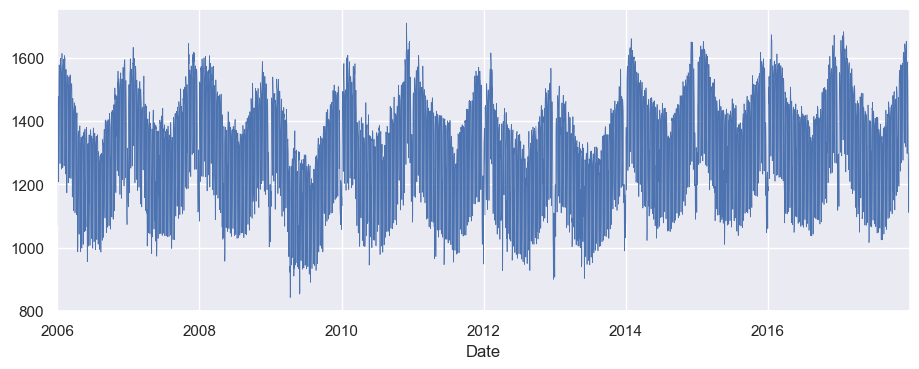

In [79]:
#using seaborn style defaults and set the default figure size

sns.set()
fig = plt.figure(figsize=(11,4), dpi=100)
opsd['Consumption'].plot(linewidth=0.5)

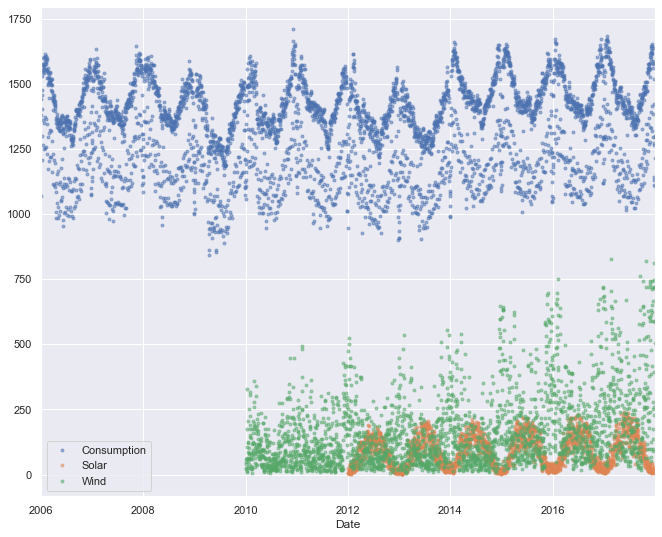

In [80]:
#lets plot the data as dots; we will include data for solar and wind

data =['Consumption', 'Solar', 'Wind']
my_plot = opsd[data].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

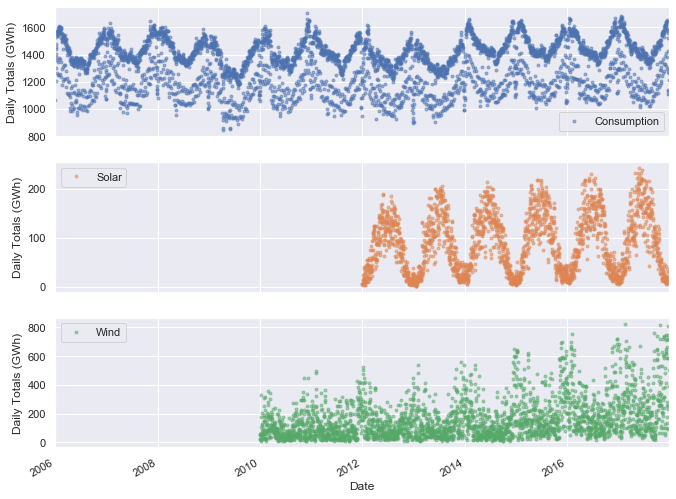

In [81]:
#make subplots true and add ylabels

#lets plot the data as dots; we will include data for solar and wind

data =['Consumption', 'Solar', 'Wind']
my_plot = opsd[data].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for plot in my_plot:
    plot.set_ylabel('Daily Totals (GWh)')

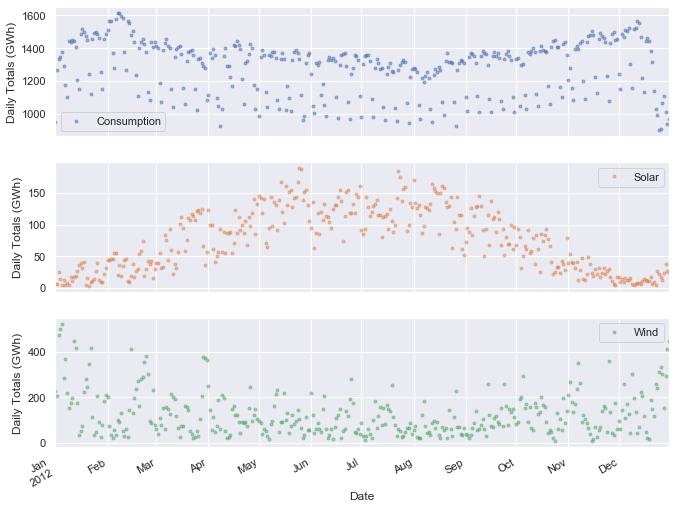

In [82]:
#make subplots true and add ylabels

#lets plot the data as dots; we will include data for solar and wind

data =['Consumption', 'Solar', 'Wind']
my_plot = opsd[data].loc['2012'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for plot in my_plot:
    plot.set_ylabel('Daily Totals (GWh)')

We can already see some intereting patterns emerging from our plots. The three time series clearly exhibit periodicity -often referred to as **seasonality** in time series analysis -in which a pattern repeats again and again at regular time intervals. Therefore we can explain these overall facts using insights from the 2012 plot as a yard stick.

Some of the insights drawn from this plots can be attributed to meteorological seasons.

Meteorological seasons:
- Winter: coldest season. Starts around Dec ending and ends around March ending.
- Spring: weather begins to get warmer
- Summer: hottest season, has long sunny days.Starts around June ending and ends around September ending
- Autumn: Marks transition from Summer to Winter

So far we can see:


- Consumption is highest in the winter and lowest in summer. Probably due to increased usage of electric heating devices for the cold.

- Consumption appears to be split into two clusters - one of the oscillations centred roughly around 1400 GWh, and another around 1100 GWh. We'll know more when we zoom into the plots.

- Solar power production appears to be lowest in winter and highest in summer. Probably due to the fact that summer has long sunny days-sunlight is abundant.

- Wind power production appears to be highest in the winter and lowest in summer. Probably due to more frequent storms and stronger windsin the winter period.

- There is an increasing trend in wind power production over the years.

Text(0, 0.5, 'Daily Consumption (GWh)')

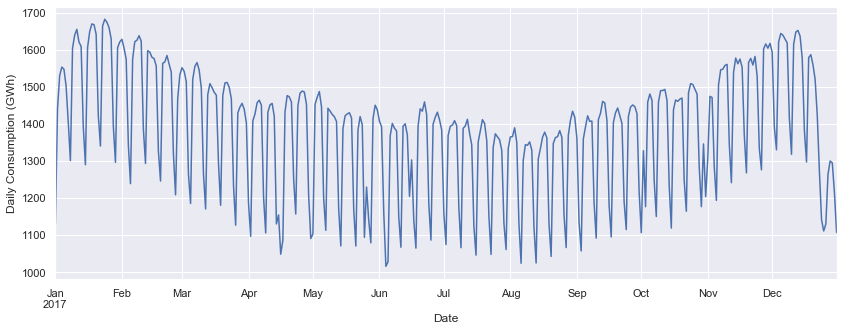

In [83]:
# To investigate further; Let's take a closer look at the time series plot for a single year

my_plot = opsd.loc['2017', 'Consumption'].plot(figsize=(14,5))
my_plot.set_ylabel('Daily Consumption (GWh)')

From the plot above, we can see there are weekly oscillations, we'll zoom in further later. We can also see the drastic drop in consumption between Dec and Jan.

Text(0, 0.5, 'Daily Consumption (GWh)')

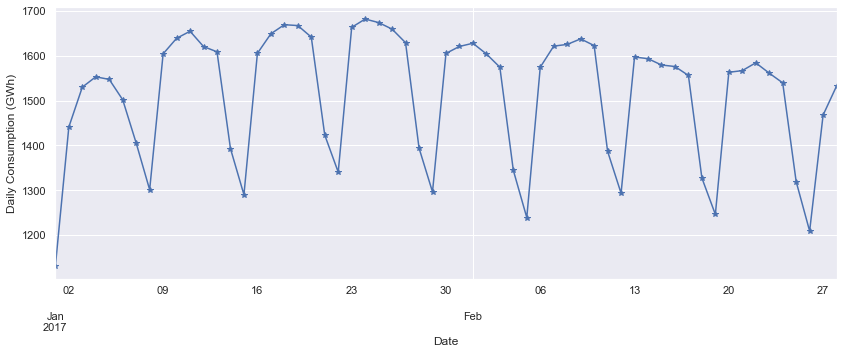

In [84]:
#zooming in

my_plot = opsd.loc['2017-01':'2017-02', 'Consumption'].plot(marker='*', figsize=(14,5))
my_plot.set_ylabel('Daily Consumption (GWh)')

It can be seen that consumption was highest on weekdays and lowest on weekends.

## Customizing time series plots

To visualize the weekly seasonality in electricity consumption in the plot above, it would be nice to have vertical gridlines on a weekly time scale(instead of on the first day of each month). We can customize our plots with matplotlib.dates

In [85]:
import matplotlib.dates as mdates

Because date/time ticks are handled a bit differently in matplotlib.dates compared with the DataFrame’s **plot()** method, let’s create the plot directly in matplotlib. Then we use **mdates.WeekdayLocator()** and **mdates.MONDAY** to set the x-axis ticks to the first Monday of each week. We also use **mdates.DateFormatter()** to improve the formatting of the tick labels

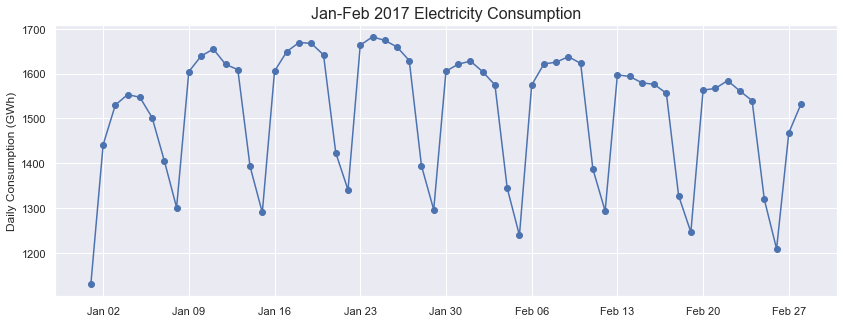

In [86]:

fig, my_plot = plt.subplots(figsize=(14,5))
my_plot.plot(opsd.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
my_plot.set_ylabel('Daily Consumption (GWh)')
my_plot.set_title('Jan-Feb 2017 Electricity Consumption', fontsize=16)

#set x-axis major ticks to weekly interval, on Mondays
my_plot.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

#Format x-tick labels as 3-letter month name and day number
my_plot.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

We can now see from the nicely formatted tick labels that electricity consumption increased during weekdays and reduced weekends.

## Seasonality

We can further explore the seasonality of our data with box plots, using seaborn's boxplot() func to group the data by different time periods and display the distributions for each group. We'll first group the data by month, to visualize yearly seasonality.

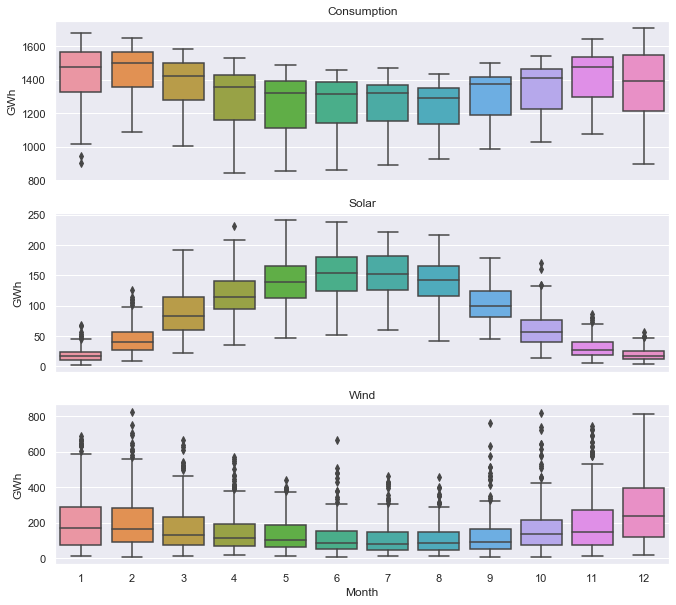

In [87]:
#create subplots, share x ticks, and remove x labels from all subplots except last one

fig, axes = plt.subplots(3,1, figsize=(11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    #Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

This box plots confirm the yearly seasonality that we saw in the earlier plots and provide extra insghts:
- Although consumption is generally higher in winter and lower in summer, consumption was lower in December and January compared to November and February. One can attribute this trend to the holiday periods. Businesses are likely closed during these periods.
- While wind and solar also exhibit yearly seasonality, the boxplot for Wind indicates more outliers as compared to solar. This is probably due to extreme wind speeds associated with transient weather conditions.

Let's group the electricity consumption time series by day of the week, to explore weekly seasonality

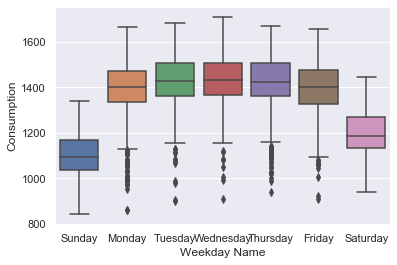

In [88]:
sns.boxplot(data=opsd, x='Weekday Name', y='Consumption')

It is clear here that weekends always had lower consumptions (this is because we have no outliers on Saturdays and Sundays). But, we can see some lower outliers on weekdays. These are probably due to public holidays or some other factors.

What about the yearly consumption plots? Let's see if consumption was extremely low or extremely high at some point.

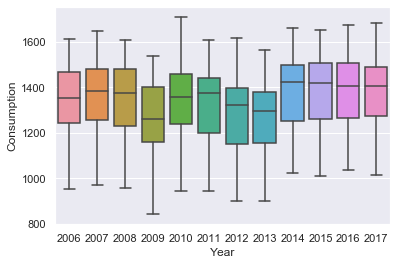

In [89]:
sns.boxplot(data=opsd, x='Year', y='Consumption')

We can see from this plot, focusing on the median, that electricity consumption for year 2009 dropped drastically, picked up in 2010 and gradually declined till 2013 (hitting second lowest to 2009). Then a sudden bump up in 2014 is followed by a slight decline in the following years. These sudden movements in these years can be attributed to some factors. 

Due to the limitation in dataset we can't compare this trend with another set of data. But a quick google search showed that the economic crisis in 2009 contributed to the decrease in electricity consumption, and also the increased investments in green energy paved a come-back in consumption the following year.

## Frequencies

The time series can be associated with a frequency in pandas. For example, usinge the `date_range()` func to create a sequence of uniformly spaced dates from 1998-03-10 through 1998-03-15 at daily frequency.

In [90]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

The resulting DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.

In [91]:
#For business days between Dec 20, 2012 and Feb 20, 2013.

pd.date_range('2012-12-20', '2013-02-20', freq='B')

DatetimeIndex(['2012-12-20', '2012-12-21', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31',
               '2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14', '2013-01-15', '2013-01-16',
               '2013-01-17', '2013-01-18', '2013-01-21', '2013-01-22',
               '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-28',
               '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01',
               '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-07',
               '2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-18', '2013-02-19',
               '2013-02-20'],
              dtype='datetime64[ns]', freq='B')

We can also create a date range of a particular frequency, specifying the start date and number of periods, instead of the start date and end date.

In [92]:
pd.date_range('1997-12-20', periods=23, freq='A')

DatetimeIndex(['1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [93]:
# Back to our opsd index, we would see that freq is set to None
opsd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

If we know that our data should be at a specific frequency, we can use the DataFrame’s asfreq() method to assign a frequency. If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (NaN), or filled according to a specified data filling method such as forward filling or interpolation.

To see how this works, let’s create a new DataFrame which contains only the Consumption data for Feb 3, 6, and 8, 2013.

In [94]:
#To select an arbitrary sequence of date/time values from a pandas time series, we need to use a DatatimeIndex, rather than simply a list of date/time strings
time_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

#select the specified dates and the consumption column
consum_sample = opsd.loc[time_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Now we use `asfreq()` method to convert the DataFrame to daily frequency, with columns for unfilled data and forward filled data.

In [95]:
#Convert to daily frequency, without filling any missing data
consum_freq = consum_sample.asfreq('D')

#Create a column with missings forwrd filled
consum_freq['Consumption-Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

#note there are different filling methods like 'backfill'/'bfill', etc. Run help(df.asfreq) to find out more

,Consumption,Consumption-Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling

**Resampling** is often important to resample our time series data to either a lower or higher frequency.
- **Downsampling**: resampling to a lower frequency. Usually involves an aggregation operation-e.g, computing monthly sales totals from daily data.
- **Upsampling**: resampling to a higher frequency(less common compared to downsampling)

We will use the DataFrame's `resample()` method, which splits the DatetimeIndex into time bins and groupscthe data by time bin. We can then apply an aggregation method such as `mean()`,`median()`, `sum()`, etc., to the data group for each time bin.

Let's resample the data to a weekly mean time series.

In [96]:
#Specify the data columns we want to include
data_cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

#resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd[data_cols].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


Plotting the daily and weekly Solar time series together to compare them.

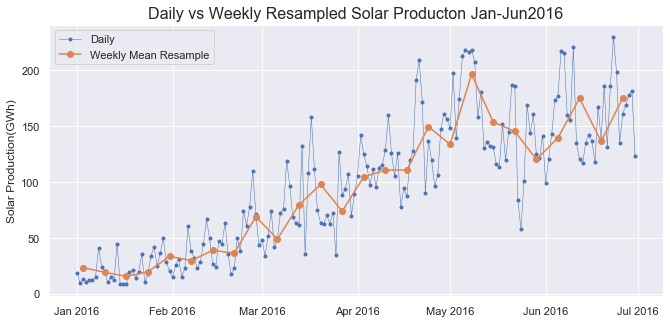

In [97]:
#time frame = '2016-01':'2016-06'
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(opsd.loc['2016-01':'2016-06', 'Solar'], marker='.', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc['2016-01':'2016-06', 'Solar'], marker='o', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production(GWh)')
ax.set_title('Daily vs Weekly Resampled Solar Producton Jan-Jun2016', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#ax.set_ylim(0,300)
ax.legend()

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

Now let's resample the data to monthly frequency, aggregating with sum totals instead of the mean. Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. We use the min_count parameter to change this behavior.

In [98]:
opsd_monthly = opsd[data_cols].resample('M').sum(min_count=28)
opsd_monthly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


Now let’s explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.

Text(0, 0.5, 'Monthly Total GWh')

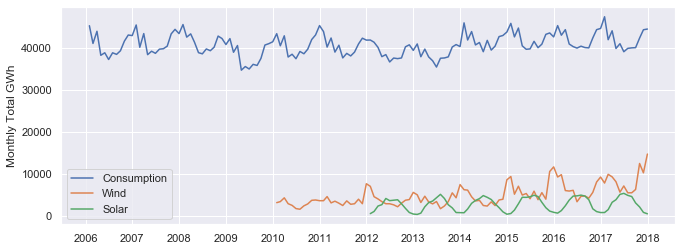

In [99]:
fig, ax = plt.subplots(figsize=(11,4))
data = ['Consumption', 'Wind', 'Solar']
for dat in data:
    ax.plot(opsd_monthly[dat], label = dat)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend()
ax.set_ylabel('Monthly Total GWh')

Text(0, 0.5, 'Monthly Total (GWh)')

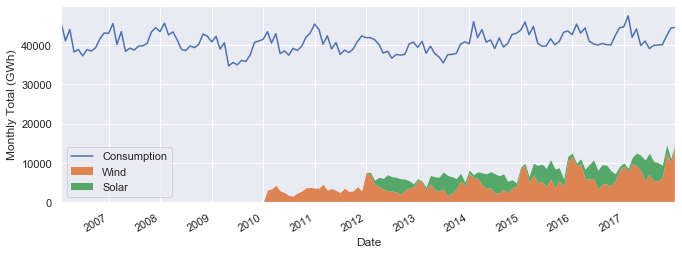

In [100]:
#or making the plot of wind and solar power production together as stacked area

fig, ax = plt.subplots(figsize=(11,4))
ax.plot(opsd_monthly['Consumption'], label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')

We can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed. Lets further resample to annual frequency and compute the ratio of Wind+Solar to Consumption for each year.

In [101]:
#resample to annual with sum and set the value for any year with less than 360 days to NaN
opsd_annual = opsd[data_cols].resample('A').sum(min_count=360)
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,NaN,NaN,NaN
2007-12-31,496631.84700,NaN,NaN,NaN
2008-12-31,495570.87600,NaN,NaN,NaN
2009-12-31,459737.42800,NaN,NaN,NaN
2010-12-31,488588.70000,35911.777,NaN,NaN
2011-12-31,484814.08600,44032.951,NaN,NaN
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [102]:
#lets set index to just years
opsd_annual.index = opsd_annual.index.year
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [103]:
#compute the ratio of solar+wind to consumption
opsd_annual['Wind+Solar / Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar / Consumption
Date,,,,,
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

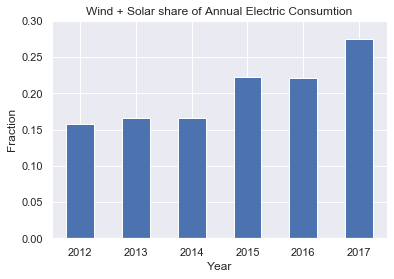

In [113]:
#Plot of ratio of wind+solar as bar chart

ax = opsd_annual.loc['2012':, 'Wind+Solar / Consumption'].plot.bar()
ax.set_title('Wind + Solar share of Annual Electric Consumtion')
ax.set_ylim(0,0.3)
ax.set_ylabel('Fraction')
ax.set_xlabel('Year')
plt.xticks(rotation=0)

## Rolling windows

Rolling windows operations are similar to downsampling. Rollin windows split the data into time windows and the data in each window is aggregated with a function such as `mean()`, `median()`, `sum()`, etc However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series. **Note**, there are different window types such as Gaussian, triangular, etc. buh, we'll use the default equally weighted window.

Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are:

- 2006-01-01 to 2006-01-07 — labelled as 2006-01-04
- 2006-01-02 to 2006-01-08 — labelled as 2006-01-05
- 2006-01-03 to 2006-01-09 — labelled as 2006-01-06

In [114]:
opsd_7days = opsd[data_cols].rolling(7, center=True).mean()
opsd_7days.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


We can see that the first non-missing rolling mean value is on 2006-01-04, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2016 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

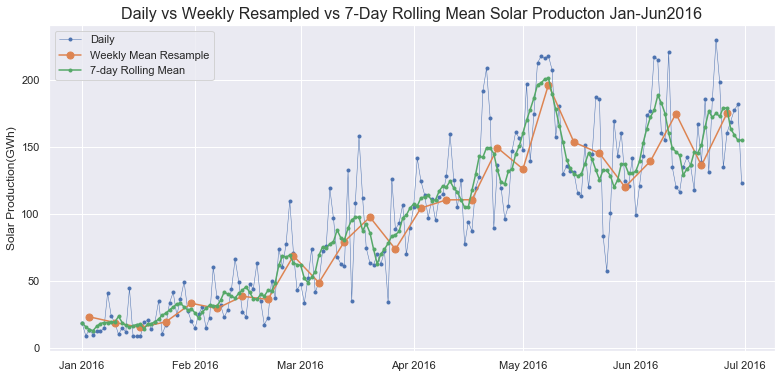

In [119]:
#time frame = '2016-01':'2016-06'
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(opsd.loc['2016-01':'2016-06', 'Solar'], marker='.', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc['2016-01':'2016-06', 'Solar'], marker='o', markersize=7, label='Weekly Mean Resample')

ax.plot(opsd_7days.loc['2016-01':'2016-06', 'Solar'], marker='.', label='7-day Rolling Mean')
ax.set_ylabel('Solar Production(GWh)')
ax.set_title('Daily vs Weekly Resampled vs 7-Day Rolling Mean Solar Producton Jan-Jun2016', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#ax.set_ylim(0,300)
ax.legend()

We can see that data points in the rolling mean time series have the sam spacing as the daily data, but the curve is smoother because higher frequency variablity has been averaged out. Also, the peaks and troughs of the rolling mean time series are closely aligned to that of the daily time series. In contrast, peaks and troughs of the weekly series don't align closely to the rolling mean series, since the resampled time series is at a coarser granularity.

## Trends

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

In [122]:
#Computing a 365-day rolling mean of our data

opsd365d = opsd[data_cols].rolling(365, center=True, min_periods=360).mean()

Text(0.5, 1.0, 'Trends in Electricity Consumption')

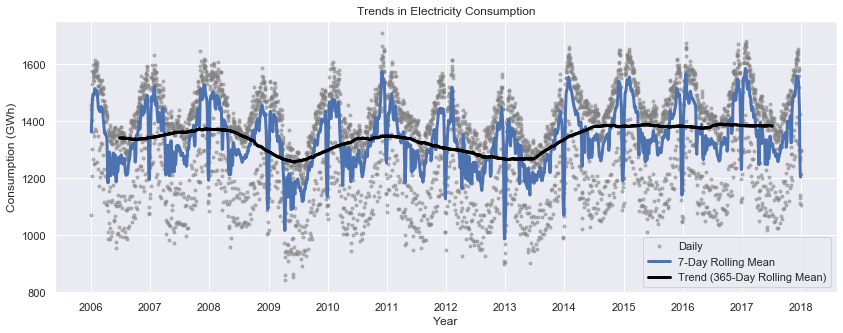

In [134]:
#Lets plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series

fig,ax =plt.subplots(figsize=(14,5))
ax.plot(opsd['Consumption'], marker='.', color='grey', alpha=0.5, linestyle='None', label='Daily')
ax.plot(opsd_7days['Consumption'], linewidth=3, label='7-Day Rolling Mean')
ax.plot(opsd365d['Consumption'], linewidth=3, color='black', label='Trend (365-Day Rolling Mean)')
ax.legend()
ax.set_xlabel('Year')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

Now let’s look at trends in wind and solar production.

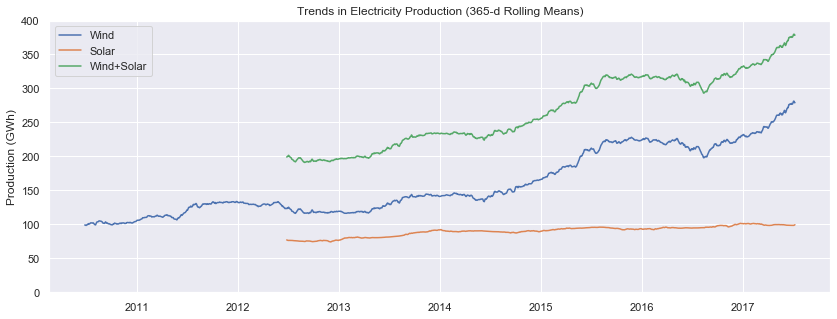

In [139]:
fig, ax = plt.subplots(figsize=(14,5))
for data in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd365d[data], label=data)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_ylim(0,400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.

**THANKS!!!**

Please note: This note was inspired by a tutorial on dataquest


## Weather Analysis for Death Valley 2014

In [104]:
import pandas as pd
death = pd.read_csv('death_valley_2014.csv', index_col=0, parse_dates=True)
death.columns

Index(['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [105]:
#check index type
death.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-27',
               '2014-12-28', '2014-12-29'],
              dtype='datetime64[ns]', name='PST', length=360, freq=None)

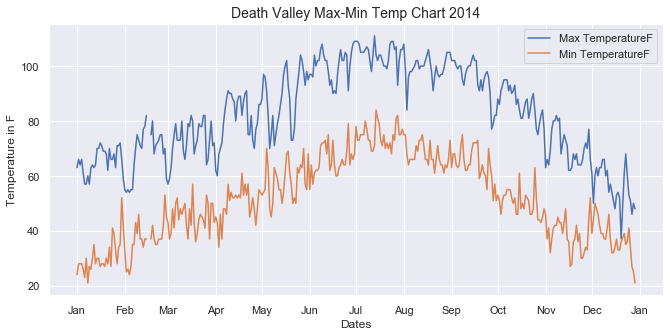

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set()
fig, myplot = plt.subplots(figsize=(11,5))
data = ['Max TemperatureF', 'Min TemperatureF']
for dat in data:
    myplot.plot(death[dat], label=dat)
myplot.set_title('Death Valley Max-Min Temp Chart 2014', fontsize=14)
myplot.set_ylabel('Temperature in F')
myplot.set_xlabel('Dates')
myplot.legend()
#use mdates
myplot.xaxis.set_major_locator(mdates.MonthLocator())

myplot.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

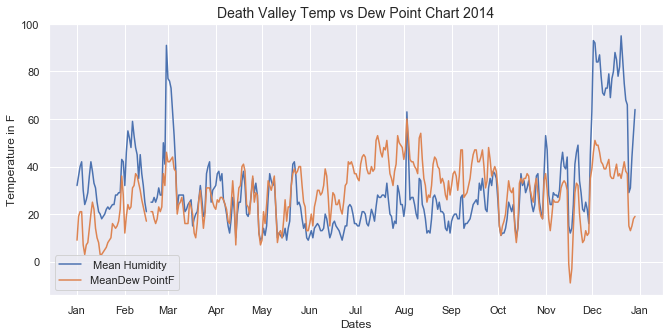

In [107]:
fig, myplot = plt.subplots(figsize=(11,5))
data = [' Mean Humidity', 'MeanDew PointF']
for dat in data:
    myplot.plot(death[dat], label=dat)
myplot.set_title('Death Valley Temp vs Dew Point Chart 2014', fontsize=14)
myplot.set_ylabel('Temperature in F')
myplot.set_xlabel('Dates')
myplot.legend()
#use mdates
myplot.xaxis.set_major_locator(mdates.MonthLocator())

myplot.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

**Note:** You can plot any data and unlock insights from them provided you're conversant with the field of study. That allows for a sweeter story-telling experience.